# 线性模型

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

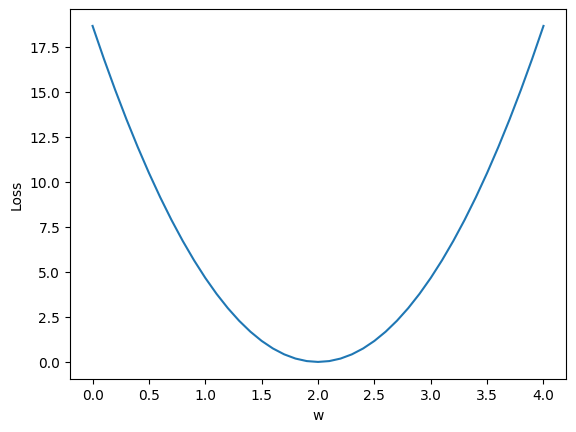

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]


def forward(x):
    return x*w


def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2


# 穷举法
w_list = []
mse_list = []
for w in np.arange(0.0, 4.1, 0.1):
    print("w=", w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        loss_val = loss(x_val, y_val)
        l_sum += loss_val
        print('\t', x_val, y_val, y_pred_val, loss_val)
    print('MSE=', l_sum/3)               # MSE (Mean Square Error)
    w_list.append(w)
    mse_list.append(l_sum/3)

plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

## 作业：实现线性模型（y=wx+b）并输出loss的3D图像。

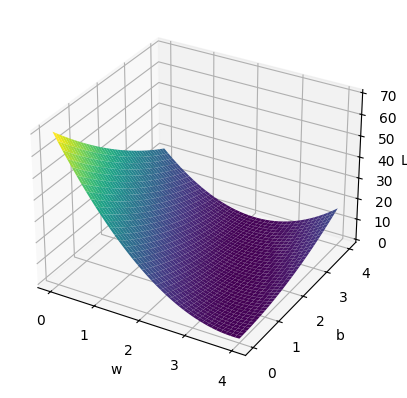

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 数据准备
x_data = np.array([1.0, 2.0, 3.0])
y_data = np.array([5.0, 8.0, 11.0])   # y = 3 * x + 2

# 前向传播函数
def forward(x, w, b):
    return x * w + b

# 损失函数
def loss(x, y, w, b):
    y_pred = forward(x, w, b)
    return (y_pred - y) ** 2

# 创建 W 和 B 的网格
W = np.arange(0.0, 4.1, 0.1)
B = np.arange(0.0, 4.1, 0.1)
w, b = np.meshgrid(W, B)

# 计算损失值
loss_values = np.zeros_like(w)

for i, w_val in enumerate(W):
    for j, b_val in enumerate(B):
        l_sum = 0
        for x_val, y_val in zip(x_data, y_data):
            loss_val = loss(x_val, y_val, w_val, b_val)
            l_sum += loss_val
        loss_values[j, i] = l_sum / len(x_data)  # 除以样本数以获得平均损失

# 绘制三维曲面图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w, b, loss_values, cmap='viridis')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

plt.show()